# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model for ride durations based on a variety of variables. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi/ride share trip durations. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>




Recall that you have a helpful tool at your disposal! Refer to the [PACE strategy document](https://docs.google.com/document/d/1IejqJvJZQ5SgL6t7VKgvTuIEL9V93w4Wy1HriG8lQ2A/template/preview?resourcekey=0-sMQ1UzEI52Z9ydH1MS3_8Q) to help apply your learning, apply new problem-solving skills, and guide your approach to this project.

# Build a multiple linear regression model

# **PACE stages**


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

<img src="images/Plan.png" width="100" height="100" align=left>


# Pace: **Plan**


## Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timedelta


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lr=LinearRegression()


`Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [48]:

# Read in data from NYC TLC dataset provided and load into dataframe
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv
print('Data loaded')

Data loaded


<img src="images/Analyze.png" width="100" height="100" align=left>

# PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Improve the performance and accuracy of the model while reducing the possibility of bias in the distribution of the dataset.

## Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [49]:
print(df.shape)
print(df.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Use `.head()`.

In [50]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Create `trip_duration`.

In [51]:
df["drop_off_converted"] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")

df["pick_up_converted"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

df['trip_duration']=(df['drop_off_converted']-df['pick_up_converted'])/np.timedelta64(1,"m")
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted,trip_duration
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43,14.066667
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28,26.500000
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56,7.200000
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59,30.250000
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20,16.716667
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,...,9.0,0.5,0.5,2.06,0.0,0.3,12.36,2017-03-25 20:42:11,2017-03-25 20:34:11,8.000000
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,...,47.5,1.0,0.5,9.86,0.0,0.3,59.16,2017-05-03 20:03:47,2017-05-03 19:04:09,59.633333
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,...,16.0,1.0,0.5,1.78,0.0,0.3,19.58,2017-08-15 18:03:05,2017-08-15 17:41:06,21.983333
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,...,9.0,0.0,0.5,0.00,0.0,0.3,9.80,2017-02-04 16:29:14,2017-02-04 16:17:07,12.116667
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,...,13.0,0.0,0.5,2.75,0.0,0.3,16.55,2017-11-10 15:40:55,2017-11-10 15:20:29,20.433333


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [52]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print('Shape before removing duplicates',df.shape)
print('Shape after removing duplicates',df.drop_duplicates().shape)
df.isna().sum().sum()

Shape before removing duplicates (22699, 21)
Shape after removing duplicates (22699, 21)


0

In [53]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


Create a scatterplot to visualize the relationship between variables of interest.

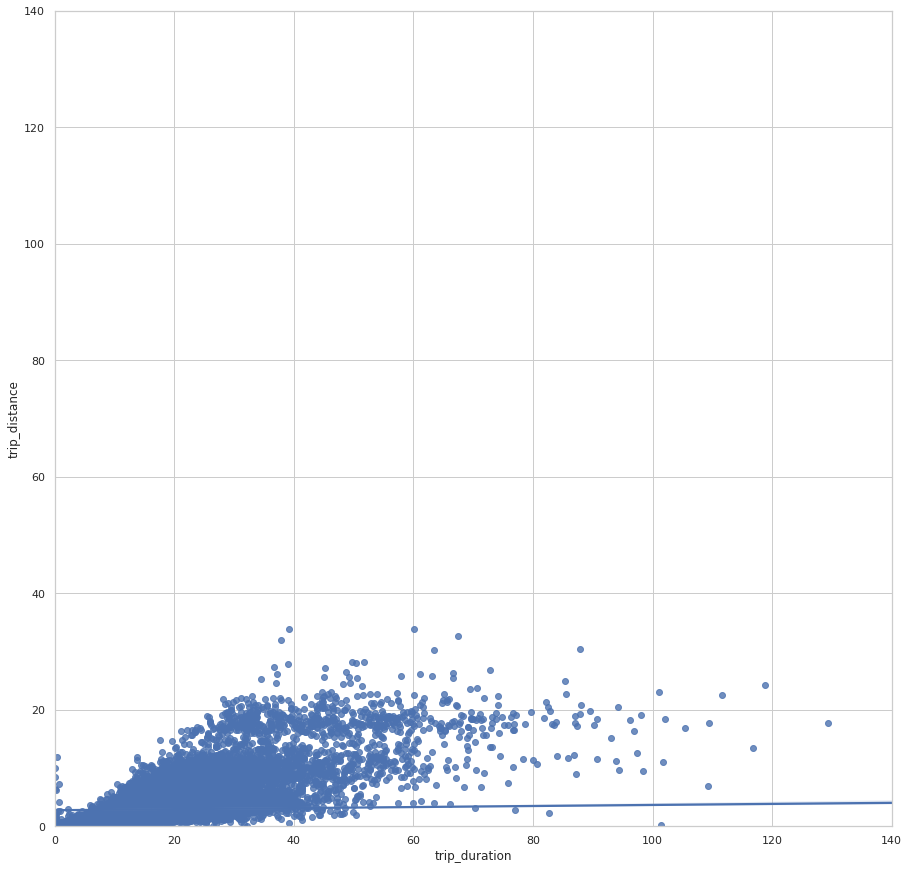

In [54]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x=df["trip_duration"], y=df["trip_distance"])
plt.ylim(0, 140)
plt.xlim(0,140)
plt.show()

Create a pairplot to visualize pairwise relationships between relevant variables.

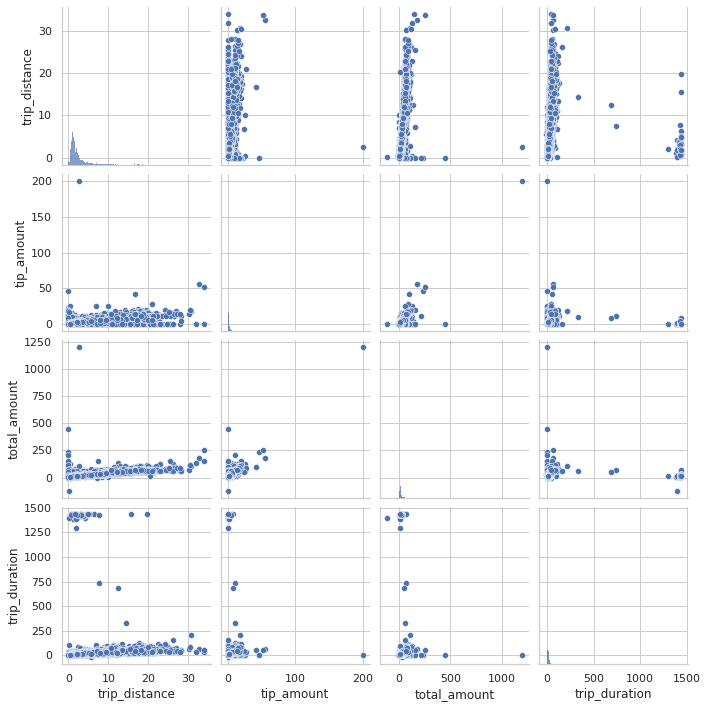

In [55]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df[['trip_distance', 'tip_amount', 'total_amount', 'trip_duration']])


## Task 2b. Address any outliers

Use a boxplot to visualize any outliers.

Text(0.5, 1.0, 'Outliers')

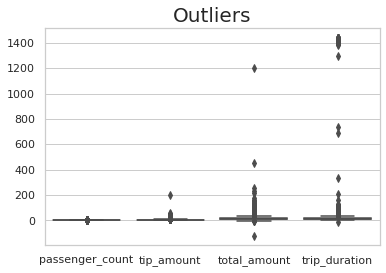

In [56]:
# Create boxplot to visualize the outliers
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=True);
g.set_title("Outliers",fontsize=20)

Use a boxplot to visualize the distribution of the data without outliers.

Text(0.5, 1.0, '4 Variables without Outliers')

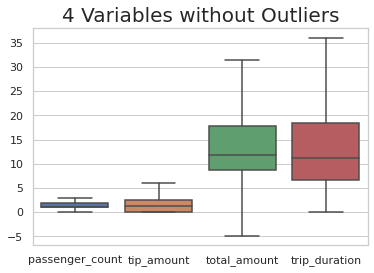

In [57]:
# Create boxplot to visualize distribution of data without outliers
g = sns.boxplot(data=df[["passenger_count","tip_amount","total_amount", "trip_duration"]], showfliers=False);
g.set_title("4 Variables without Outliers",fontsize=20)

Remove outliers as needed.

In [58]:
dpercentile_25 = df['trip_duration'].quantile(0.25)
dpercentile_75 = df['trip_duration'].quantile(0.75)
iqr= dpercentile_75 - dpercentile_25
upper_limit = dpercentile_75 + 1.5 * iqr

df[df["trip_duration"] > upper_limit] = upper_limit
df[df["trip_duration"] < 0] = 0

apercentile_25 = df["total_amount"].quantile(0.25)
apercentile_75 = df["total_amount"].quantile(0.75)
iqr= apercentile_75 - apercentile_25
aupper_limit = apercentile_75 + 1.5 * iqr

df[df["total_amount"] > aupper_limit] = aupper_limit
df[df["total_amount"] < 0] = 0

## Task 2c. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [59]:
df.corr(method='pearson')

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
Unnamed: 0,1.000000,-0.484018,-0.480060,-0.479913,-0.484752,0.249919,0.254780,-0.483891,-0.388750,-0.484724,-0.484852,-0.480481,-0.484900,-0.484874,-0.350981,-0.309621
VendorID,-0.484018,1.000000,0.991630,0.986383,0.998592,-0.531011,-0.517895,0.997301,0.812167,0.997964,0.998656,0.988855,0.998252,0.998655,0.733121,0.670141
passenger_count,-0.480060,0.991630,1.000000,0.979200,0.991031,-0.526598,-0.512815,0.989897,0.807055,0.990369,0.991107,0.981257,0.990722,0.991107,0.728428,0.666417
trip_distance,-0.479913,0.986383,0.979200,1.000000,0.987447,-0.533220,-0.524301,0.986066,0.885940,0.987087,0.987586,0.985027,0.987633,0.987580,0.818807,0.744132
RatecodeID,-0.484752,0.998592,0.991031,0.987447,1.000000,-0.530776,-0.517753,0.998632,0.813416,0.999219,0.999908,0.990166,0.999550,0.999921,0.734320,0.670954
PULocationID,0.249919,-0.531011,-0.526598,-0.533220,-0.530776,1.000000,0.349153,-0.530324,-0.459258,-0.530773,-0.530843,-0.526370,-0.530851,-0.530875,-0.419093,-0.379278
DOLocationID,0.254780,-0.517895,-0.512815,-0.524301,-0.517753,0.349153,1.000000,-0.517543,-0.459545,-0.518097,-0.517718,-0.514729,-0.518053,-0.517755,-0.423095,-0.380769
payment_type,-0.483891,0.997301,0.989897,0.986066,0.998632,-0.530324,-0.517543,1.000000,0.811169,0.997943,0.998685,0.983980,0.998322,0.998688,0.726262,0.668878
fare_amount,-0.388750,0.812167,0.807055,0.885940,0.813416,-0.459258,-0.459545,0.811169,1.000000,0.812888,0.813251,0.835297,0.814062,0.813258,0.980331,0.940505
extra,-0.484724,0.997964,0.990369,0.987087,0.999219,-0.530773,-0.518097,0.997943,0.812888,1.000000,0.999308,0.989821,0.998920,0.999309,0.735808,0.670915


Visualize a correlation heatmap of the data.

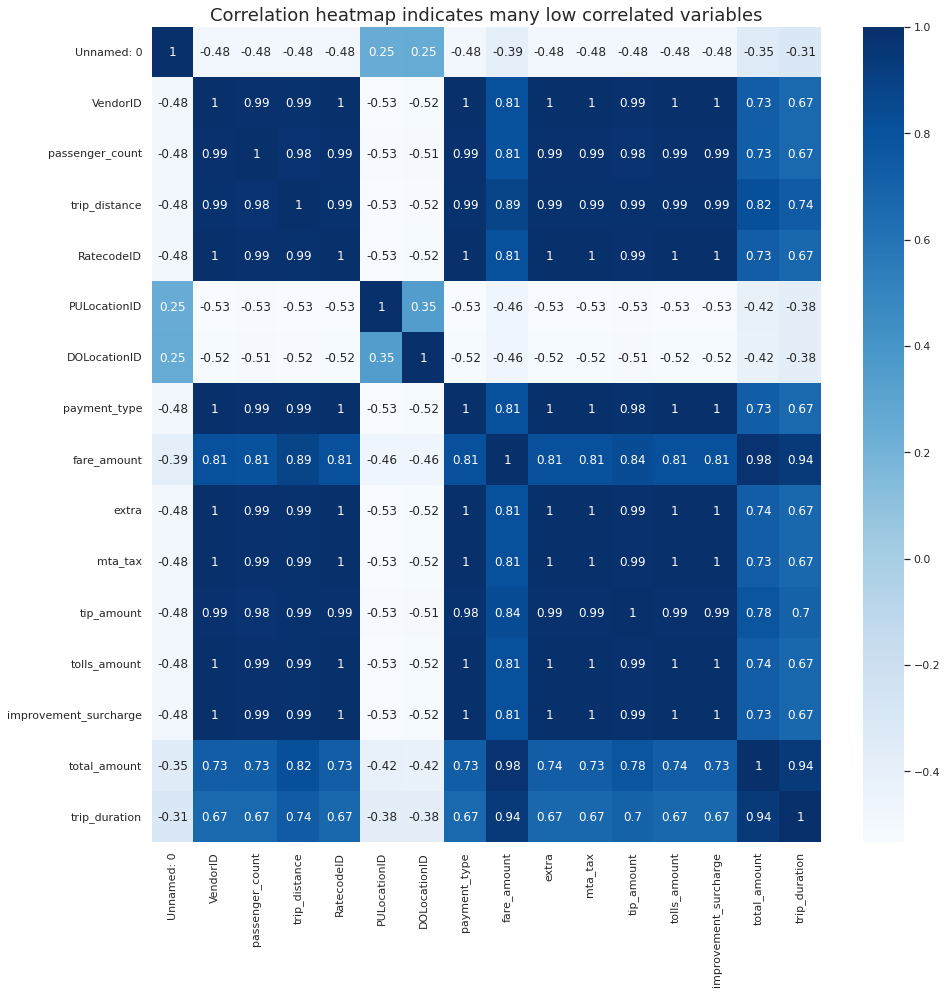

In [72]:
# Create correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method="pearson"), annot=True, cmap="Blues")
plt.title("Correlation heatmap indicates many low correlated variables",
          fontsize=18)
plt.show()

<img src="images/Construct.png" width="100" height="100" align=left>

# PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in the [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Constructing stage of this task.
* Why did you select the X variables you did?

Dropped columns based on correlations between variables and multicollinearity, and fine-tuned by running and rerunning models to examine change in R^2, MAE, and RMSE.

## Task 3a. Select outcome variable and features

Set your Y and X variables. Y represents the outcome variable, and X represents the features.

In [73]:
Y = df[["trip_duration"]]
X = df.drop(columns="trip_duration")
X.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,drop_off_converted,pick_up_converted
0,24870114.0,2.0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6.0,3.34,1.0,N,100.0,231.0,1.0,13.0,0.0,0.5,2.76,0.0,0.3,16.56,2017-03-25 09:09:47,2017-03-25 08:55:43
1,35634249.0,1.0,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1.0,1.80,1.0,N,186.0,43.0,1.0,16.0,0.0,0.5,4.00,0.0,0.3,20.80,2017-04-11 15:19:58,2017-04-11 14:53:28
2,106203690.0,1.0,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1.0,1.00,1.0,N,262.0,236.0,1.0,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2017-12-15 07:34:08,2017-12-15 07:26:56
3,38942136.0,2.0,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1.0,3.70,1.0,N,188.0,97.0,1.0,20.5,0.0,0.5,6.39,0.0,0.3,27.69,2017-05-07 13:48:14,2017-05-07 13:17:59
4,30841670.0,2.0,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1.0,4.37,1.0,N,4.0,112.0,2.0,16.5,0.5,0.5,0.00,0.0,0.3,17.80,2017-04-15 23:49:03,2017-04-15 23:32:20


## Task 3b. Pre-process data

To help with processing time, consider dropping irrelevant and redundant columns.

In [74]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'store_and_fwd_flag', 'passenger_count', 'VendorID',
                   'fare_amount', 'PULocationID', 'DOLocationID', 'total_amount',
                   'drop_off_converted', 'pick_up_converted']
X = X.drop(columns_to_drop, axis=1)
X = X.loc[:, ~X.columns.str.contains("Unnamed")]
X.head()

,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,3.34,1.0,1.0,0.0,0.5,2.76,0.0,0.3
1,1.80,1.0,1.0,0.0,0.5,4.00,0.0,0.3
2,1.00,1.0,1.0,0.0,0.5,1.45,0.0,0.3
3,3.70,1.0,1.0,0.0,0.5,6.39,0.0,0.3
4,4.37,1.0,2.0,0.5,0.5,0.00,0.0,0.3


Use `StandardScaler()` and `fit_transform()` to standardize the X variables.

In [76]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
print("X scaled:", X_scaled)


X scaled: [[-0.18116118 -0.33999272 -0.37659905 ... -0.18555461 -0.34096692
  -0.33964103]
 [-0.35082338 -0.33999272 -0.37659905 ... -0.05118079 -0.34096692
  -0.33964103]
 [-0.43895959 -0.33999272 -0.37659905 ... -0.32751404 -0.34096692
  -0.33964103]
 ...
 [-0.50285834 -0.33999272 -0.26740498 ... -0.48464472 -0.34096692
  -0.33964103]
 [-0.28912804 -0.33999272 -0.37659905 ... -0.30042255 -0.34096692
  -0.33964103]
 [-0.31777231 -0.33999272 -0.37659905 ... -0.22998466 -0.34096692
  -0.33964103]]


## Task 3c. Build model

Create training and testing sets.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=0)

Build and fit your model to the data.

In [79]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Task 3d. Evaluate model

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [83]:
r_sq = lr.score(x_train, y_train)
print("Coefficient of determination:", r_sq)
y_pred = lr.predict(x_train)
print("R^2:", r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_pred)))

Coefficient of determination: 0.7391110948153115
R^2: 0.7391110948153116
MAE: 3.2119417836310444
RMSE: 4.5781331414091895


In [84]:
r_sq_test = lr.score(x_test, y_test)
print("Coefficient of determination:", r_sq_test)
y_pred_test = lr.predict(x_test)
print("R^2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test,y_pred_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.7332003491146651
R^2: 0.7332003491146653
MAE: 3.2214448090342804
RMSE: 4.601147377111918


<img src="images/Execute.png" width="100" height="100" align=left>

# PACE: **Execute**

Consider these questions [PACE Strategy Doc](https://docs.google.com/document/d/1HzWWcQzBqsySFdpftbXjHDDkEUxa8Q9Rh7goVnSrAfc/edit?usp=sharing) to reflect on the Execute stage of this task.

## Task 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [85]:
results = pd.DataFrame(data={"actual": y_test["trip_duration"],
                             "predicted": y_pred_test.ravel()})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
5818,18.016667,15.666455,2.350212
18134,31.375000,31.375124,-0.000124
4655,5.883333,7.334027,-1.450693
7378,15.950000,18.339652,-2.389652
13914,11.900000,11.543187,0.356813


## Task 4b. Visualize model results

Create a scatterplot to visualize `predicted` over `actual`.

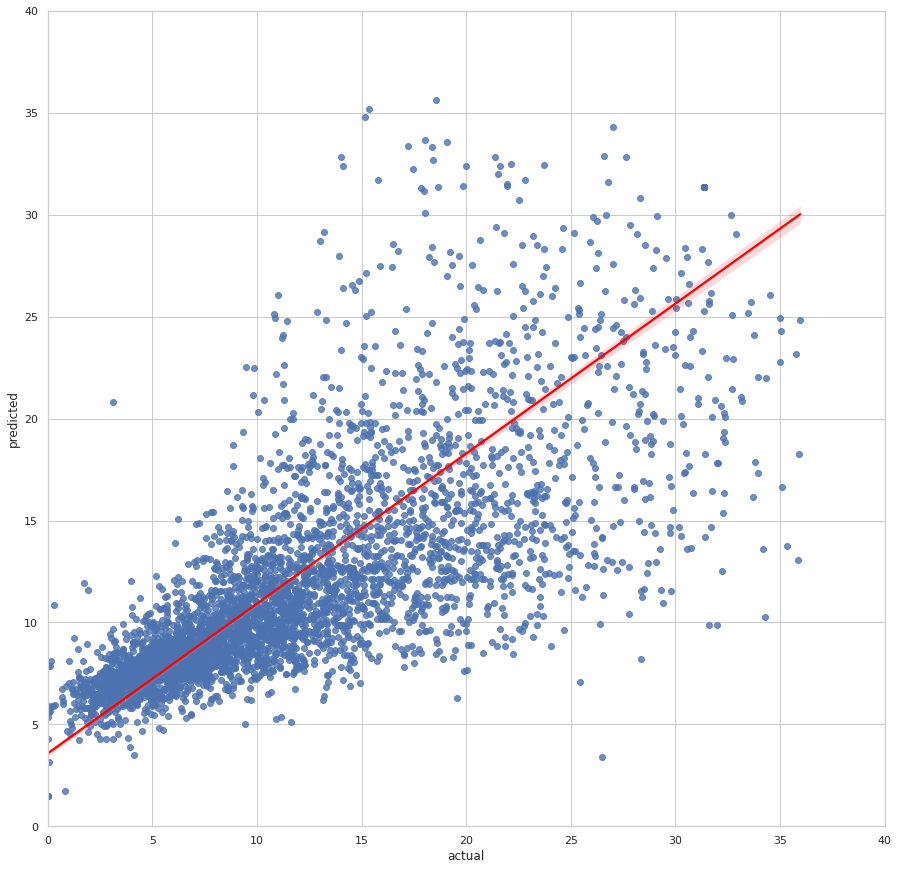

In [86]:
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
sns.regplot(x="actual",
           y="predicted",
           data=results, line_kws={"color": "red"})
plt.ylim(0, 40)
plt.xlim(0,40)
plt.show()

Visualize the distribution of the `residuals`.

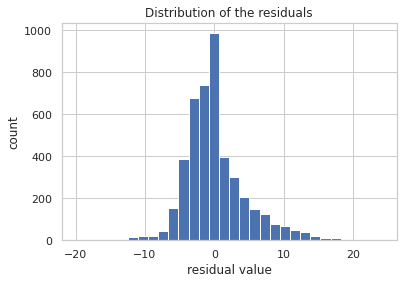

In [87]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###

plt.hist(results["residual"], bins=30)
plt.title("Distribution of the residuals")
plt.xlabel("residual value")
plt.ylabel("count")
plt.show()

Create a scatterplot of `residuals` over `predicted`.

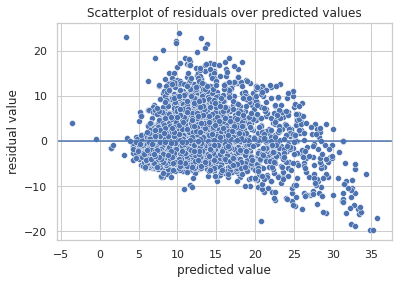

In [88]:
sns.scatterplot(x="predicted", y="residual", data=results)
plt.axhline(0)
plt.title("Scatterplot of residuals over predicted values")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

## Task 4c. Conclusion

1. What results can be presented from this notebook?


1. It would be important to present the model's assumptions and precision of the model through the MAE and the RMSE